# Lending Case Study EDA

In [109]:
#Load the libraries which will be required further for analysis
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings("ignore")

In [110]:
#Load the data and print few rows
lending_case = pd.read_csv("/Users/nyashasingh/Desktop/upgrad/upgrad-case-studies-solutions/lending-case-study/loan.csv")
lending_case.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [111]:
#Check number of rows and columns, validate columns with higher null values
print("Rows and column :: ", lending_case.shape)

Rows and column ::  (39717, 111)


## Data Cleaning (steps taken)
<ul>
  <li>Fix rows and columns i.e. remove columns containing NA </li>
  <li>Fix missing values </li>
  <li>Standardise values i.e. fix the right data type </li>
  <li>Filter Data (For ex: loan approved amount can not be greater than Loan applied amount) </li>
  <li>Drop Duplicates</li>
</ul>

#### Check the columns with all the values as NA and drop them

In [112]:
columns_to_drop = lending_case.columns[lending_case.isna().all()].tolist()
lending_case = lending_case.drop(columns = columns_to_drop)
print("Shape after dropping columns with all missing values :: ", lending_case.shape)

Shape after dropping columns with all missing values ::  (39717, 57)


#### Function to print missing values to be used  

In [113]:
#Function to print data frame stats where columns has missing value greater than zero
def print_columns_with_missing_value(df_table):
    missing_values_column = df_table.isnull().sum().to_frame('missing_values')
    print(missing_values_column[missing_values_column.missing_values > 0])
    
print_columns_with_missing_value(lending_case)  
#Should we drop the columns blindly where it has more than 70% missing value, 
#blindly drop them#df[df.missing_values > len(lending_case.index) * 0.70]    

                            missing_values
emp_title                             2459
emp_length                            1075
desc                                 12940
title                                   11
mths_since_last_delinq               25682
mths_since_last_record               36931
revol_util                              50
last_pymnt_d                            71
next_pymnt_d                         38577
last_credit_pull_d                       2
collections_12_mths_ex_med              56
chargeoff_within_12_mths                56
pub_rec_bankruptcies                   697
tax_liens                               39


#### Drop column with missing rows and and of no importance

In [114]:
#drop columns
columns_to_drop = ['emp_title', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
lending_case = lending_case.drop(columns = columns_to_drop)
print("Shape after dropping additional columns :: ", lending_case.shape)

#drop columns with no imp. Note: tax_liens
columns_with_no_imp = ['member_id', 'url', 'desc', 'zip_code', 'tax_liens']
lending_case = lending_case.drop(columns = columns_with_no_imp)
print("Shape after dropping columns with no importance :: ", lending_case.shape)

Shape after dropping additional columns ::  (39717, 53)
Shape after dropping columns with no importance ::  (39717, 48)


In [115]:
#check again columns with missing values
print_columns_with_missing_value(lending_case)    

                            missing_values
emp_length                            1075
title                                   11
revol_util                              50
last_pymnt_d                            71
last_credit_pull_d                       2
collections_12_mths_ex_med              56
chargeoff_within_12_mths                56
pub_rec_bankruptcies                   697


In [116]:
#Drop additional columns as its not needed, our purpose is to flag the customer when the loan is applied
additional_colums_to_drop = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'delinq_amnt']
lending_case = lending_case.drop(columns = additional_colums_to_drop)
print("Shape after dropping columns with no importance :: ", lending_case.shape)

Shape after dropping columns with no importance ::  (39717, 45)


#### Data Imputation fill unknown column values

In [117]:
#Replace employee length as zero i.e. they do not have an experience
lending_case['emp_length'].unique() #unique values
lending_case['emp_length'].fillna('0', inplace = True)
lending_case['emp_length'].isnull().sum()

#Fill the missing values Unknown, this parameter may be used in combination with others to see the customer
lending_case['pub_rec_bankruptcies'].unique()
lending_case['pub_rec_bankruptcies'].fillna('Unknown', inplace = True)
lending_case['pub_rec_bankruptcies'].isnull().sum()

0

In [118]:
#check columns with missing values again
print_columns_with_missing_value(lending_case)

                    missing_values
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2


#### Check the data types of columns to be analused
<font color="red">Our focus should be on column shown as object, which dataframe was unable to determine right data type </font>

In [119]:
#Analyze columsn with data type 'object' and fix data type
lending_case.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
initial_list_status 

In [120]:
#analyze the columns, glance what data they have before changing
print(lending_case.columns)
lending_case.head(2)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'pub_rec_bankruptcies'],
      dtype='object')


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.0,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.0,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0


#### Fix int_rate and emp_length data type

In [121]:
lending_case['int_rate'] = lending_case['int_rate'].str.replace('[%]', '')
lending_case['emp_length'] = lending_case['emp_length'].str.replace('[^0-9]+', '')

columns_to_float_dtype = ['int_rate', 'emp_length']
lending_case[columns_to_float_dtype] = lending_case[columns_to_float_dtype].apply(pd.to_numeric)

#Print columns data types and confirm if they have right data type
lending_case.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
initial_list_status 

### Derive the columns for analysis
<font color="red">Extract the year and month as it may be beneficial when the users are applying</font>

In [122]:
#pd.to_datetime(lending_case['issue_d'], format="%b-%y").dt.year
lending_case['issue_d'] = pd.to_datetime(lending_case['issue_d'], format="%b-%y")
lending_case['issue_d_year'] = lending_case['issue_d'].dt.year
lending_case['issue_d_month'] = lending_case['issue_d'].dt.month

In [123]:
print(lending_case[['issue_d', 'issue_d_year', 'issue_d_month']].head(2))
print(lending_case['issue_d'].dtypes)

     issue_d  issue_d_year  issue_d_month
0 2011-12-01          2011             12
1 2011-12-01          2011             12
datetime64[ns]


### Data Filtering 
<font color="red">Filter the rows where funded_amnt is greater than loan_amnt and funded_amnt_inv < funded_amnt </font>

In [124]:
### Safety check for ex. loan_amnt < funded_amnt and funded_amnt < funded_amnt_inv
print("length before filtering ::", len(lending_case))
lending_case = lending_case[(lending_case['loan_amnt'] <= lending_case['funded_amnt']) & (lending_case['funded_amnt_inv'] <= lending_case['funded_amnt'])]
print("length after filtering ::", len(lending_case)) 

length before filtering :: 39717
length after filtering :: 37868


### Drop duplicates

In [125]:
lending_case.drop_duplicates()
print("length after dropping duplicates ::", len(lending_case)) 

length after dropping duplicates :: 37868


# Univariate analysis (Summary)
   1. Loan status : <font color="red">Out of all the loans 14% are defaulted</font>
   2. Purpose in defaulted loan : <font color="red">debit_consolidation, credit_card, other, small_business & home improvement contributes more than anyone else</font>
   3. Home ownership : <font color="red">Rent and Mortgage contributes more in defaulted loans</font>
   4. Interest rate : <font color="red">Approx 0.2% are in outlier</font> 
   5. Annual income: <font color="red">10% are in outlier</font> 
   6. Loan amount : <font color="red">Loan & funded amount are similar funded amount can be ignored later</font> 
   7. Funded amount : <font color="red">Will be ignored as distribution is similar to loan & amount</font> 
   8. issue_d & derived variable analysis: <font color="red">Loans are issued more in dec month</font> 

In [126]:
#print columns before analyzing the values
lending_case.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month'],
      dtype='object')

#### Categorical variable loan_status analysis

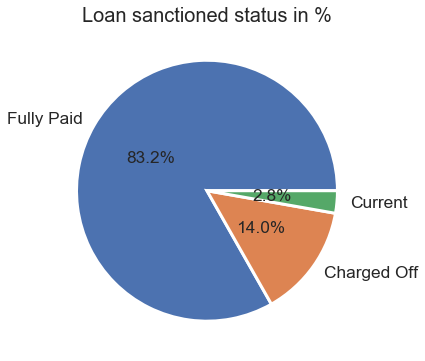

In [127]:
# pie chart function
def print_pie_chart (title, pie_chart_df):
    pie, ax = plt.subplots(figsize=[10,6])
    labels  = pie_chart_df.keys()
    plt.pie(x = pie_chart_df, autopct="%.1f%%", labels=labels, pctdistance=0.5, 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'x-large'})
    plt.title(title, fontsize=20)
    
#Check the loan status i.e. how many loans were paid
loan_status_pie_chart = round((lending_case['loan_status'].value_counts()/len(lending_case))*100, 2)
print_pie_chart('Loan sanctioned status in %', loan_status_pie_chart)    

#### Categorical variable "Purpose" analysis who defaulted
<font color="red">Observation: </font> debit_consolidation, credit_card, other, small_business & home improvementcontributes more than anyone else

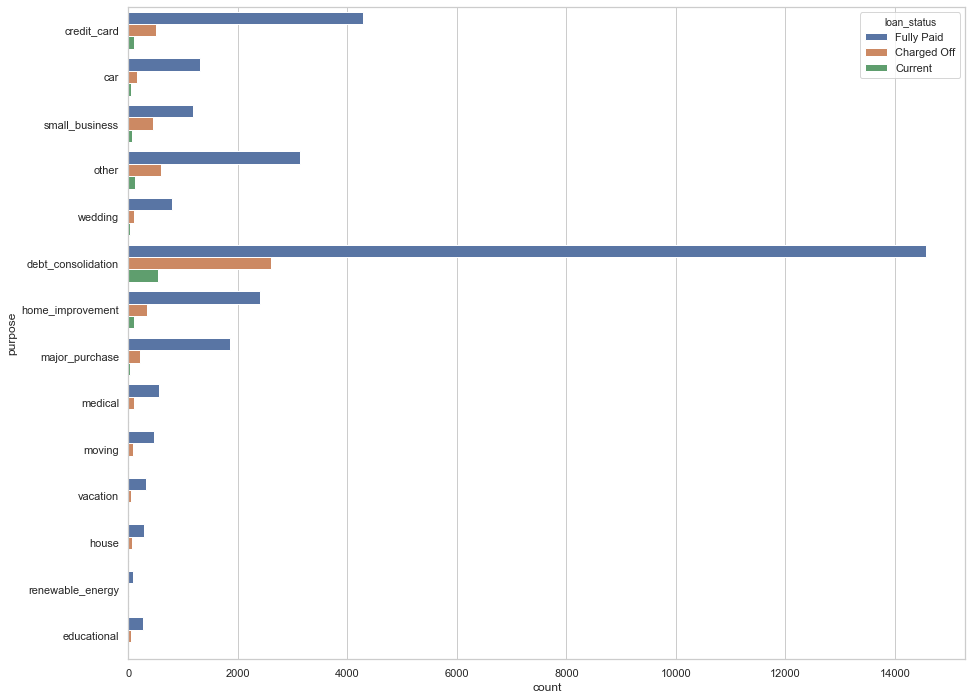

In [128]:
plt.figure(figsize=[15,12])
sns.countplot(y = "purpose", hue="loan_status", data = lending_case)

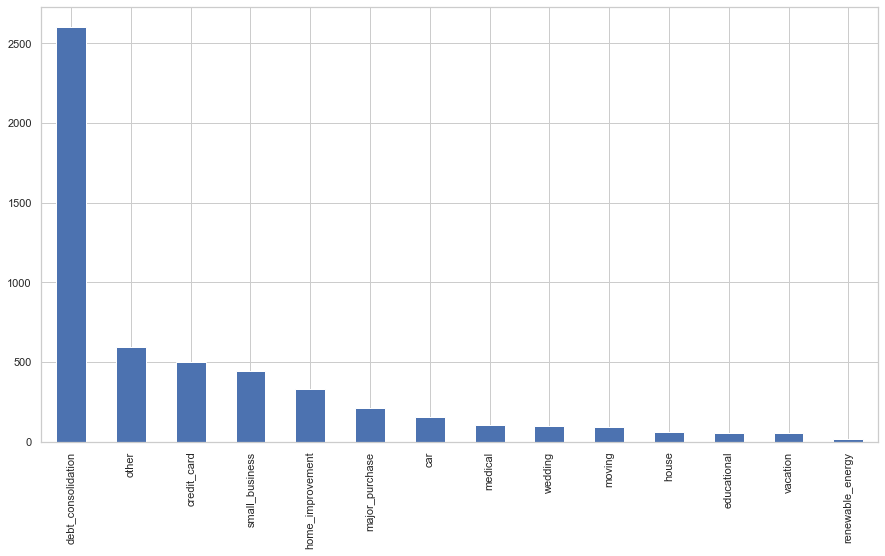

In [129]:
# Further Analysis for only defaulted loans
plt.figure(figsize=[15,8])
charged_off_loans = lending_case[(lending_case['loan_status'] == 'Charged Off')]
charged_off_loans['purpose'].value_counts().plot.bar() 

#### Categocial variable "Home ownership" analysis
<font color="red">Observation: </font>RENT & MORTAGE contributes alot for defaulted loans

home_ownership  loan_status
MORTGAGE        Fully Paid     13905
                Charged Off     2145
                Current          577
NONE            Fully Paid         3
OTHER           Fully Paid        73
                Charged Off       15
OWN             Fully Paid      2441
                Charged Off      424
                Current           81
RENT            Fully Paid     15091
                Charged Off     2723
                Current          390
Name: loan_status, dtype: int64


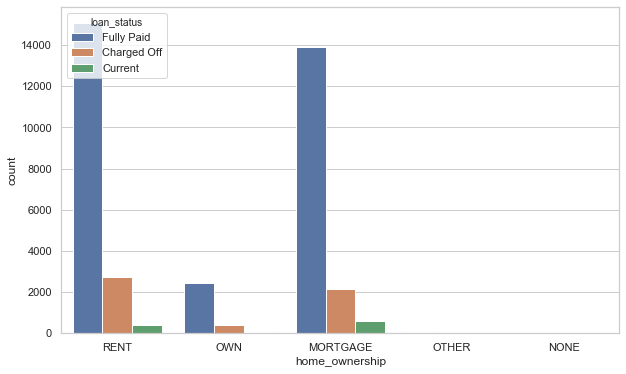

In [130]:
print(lending_case.groupby(['home_ownership'])['loan_status'].value_counts())
plt.figure(figsize=[10,6])
sns.countplot(x = "home_ownership", hue="loan_status", data =lending_case)

### Analysis of quantifier variables.
<ul>
    <li><font color="red">loan_amount:</font> funded_amnt will be after approving the loan but before analyzing check the avg.</li>
  <li><font color="red">interest_rate:</font> analysis box blot</li>
  <li><font color="red">annual_inc:</font> annual income analysis</li>
  <li><font color="red">tenure:</font> As the loan applied for specific duration adn unique() function shows only two lets skip it for now</li>
</ul>    

#### Interest rate analysis
<font color="red">We can ignore outliers, use quantile to ignore the percentage column</font>

count    37868.000000
mean        12.015777
std          3.693572
min          5.420000
25%          9.250000
50%         11.860000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64


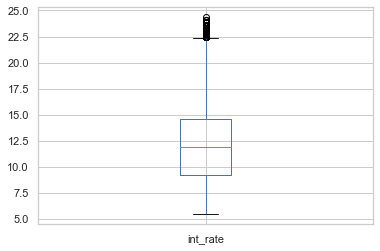

In [131]:
print(lending_case['int_rate'].describe())
lending_case['int_rate'].plot.box()
#99% of people are getting interest rate < 20.00 , lending_case['int_rate'].quantile(0.99), we should ignore the rest

#### loan_amount analysis

count    37868.000000
mean     10844.408207
std       7229.445777
min        500.000000
25%       5000.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


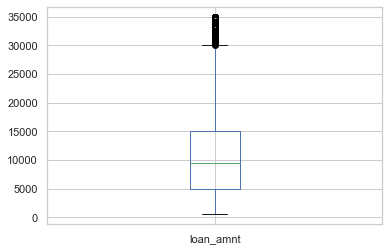

In [132]:
print(lending_case['loan_amnt'].describe())
lending_case['loan_amnt'].plot.box()
#95% of people are less than within limit <= 25000.0 lending_case['loan_amnt'].quantile(0.95)

#### Annual_income analysis

count    3.786800e+04
mean     6.821043e+04
std      6.121633e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.800000e+04
75%      8.100000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


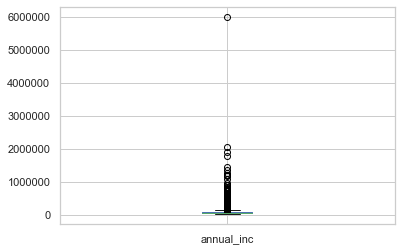

In [133]:
print(lending_case['annual_inc'].describe())
lending_case['annual_inc'].plot.box()

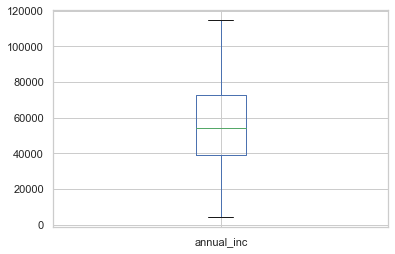

In [134]:
#90% of the people are not in outliers, only top 10% of the people are, we can ignore the top people after checking if they are defaulted
lending_case[(lending_case['annual_inc'] < lending_case['annual_inc'].quantile(0.90))]['annual_inc'].plot.box()

#### Loan amount, funded_amnt & funded_amnt_inv analysis
<font color="red">Distributions are same it means only one of them can be used, we can use loan_amnt for our analysis </font>

<Figure size 1080x432 with 0 Axes>

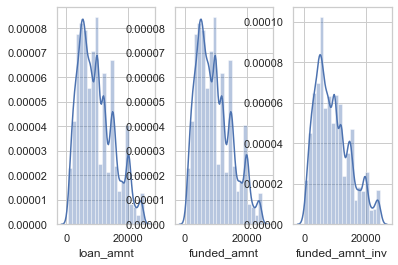

In [135]:
plt.figure(figsize=[15,6])
fig, ax =plt.subplots(1,3)
loan_amnt = lending_case[(lending_case['loan_amnt'] < lending_case['loan_amnt'].quantile(0.95))]
sns.distplot(loan_amnt['loan_amnt'], bins = 20, ax=ax[0])

funded_amnt = lending_case[(lending_case['funded_amnt'] < lending_case['funded_amnt'].quantile(0.95))]
sns.distplot(funded_amnt['funded_amnt'], bins = 20, ax=ax[1])

funded_amnt_inv = lending_case[(lending_case['funded_amnt_inv'] < lending_case['funded_amnt_inv'].quantile(0.95))]
sns.distplot(funded_amnt_inv['funded_amnt_inv'], bins = 20, ax=ax[2])

plt.show()


In [136]:
#drop columns funded_amnt & funded_amnt_inv as loan_amnt is alone sufficient for prediction
columns_not_required_analysis = ['funded_amnt', 'funded_amnt_inv']
lending_case = lending_case.drop(columns = columns_not_required_analysis)
print("Shape after dropping columns with no importance :: ", lending_case.shape)

Shape after dropping columns with no importance ::  (37868, 45)


#### Loan paying term analysis
Charged off loans are same in both 36 & 60 months, and number of Full Paid applicants are more in 36 months

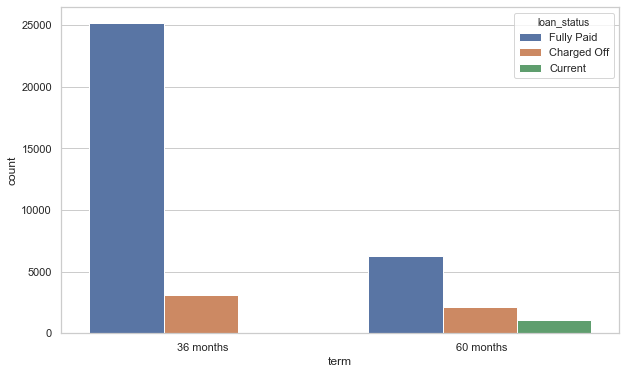

In [137]:
plt.figure(figsize=[10,6])
sns.countplot(x = "term", hue="loan_status", data =lending_case)

#### Categorical variable issue_d analysis
<font color="red">There is not much significance as the year progresses, people tend to take more loan </font>

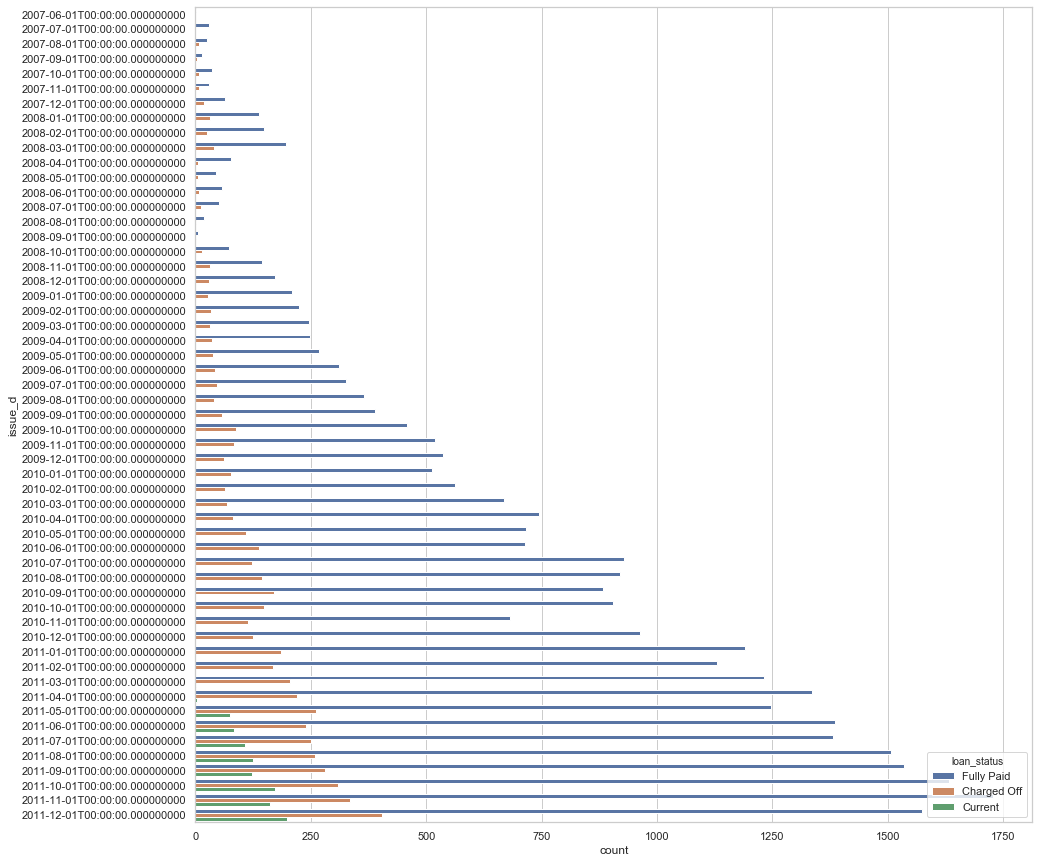

In [138]:
plt.figure(figsize=[15,15])
sns.countplot(y = "issue_d", hue="loan_status", data =lending_case)

#### Categorical variable (derived) issue_d_month analysis
<font color="red"> Almost all the months contributes equally and december is the most, one of the reason could be people take higher loans in that month because income tax document submission starts in dec </font>

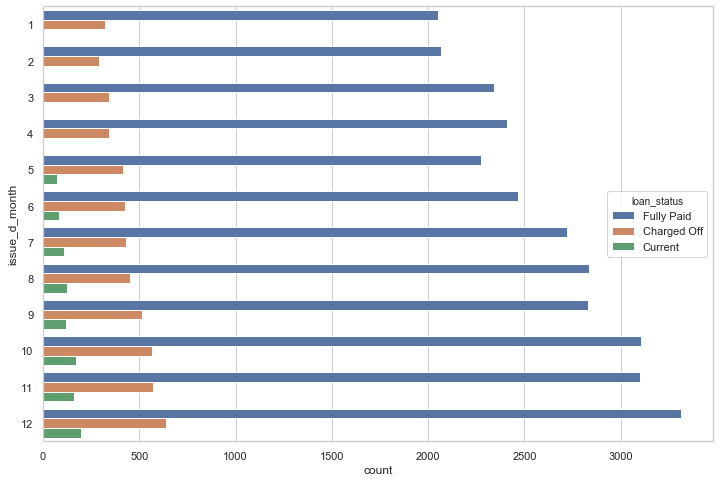

In [139]:
plt.figure(figsize=[12,8])
sns.countplot(y = "issue_d_month", hue="loan_status", data =lending_case)

### Find the relation between variables before proceeding further

In [140]:
lending_case.corr()

,id,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,issue_d_year,issue_d_month
id,1.000000,0.143636,0.068306,0.077759,0.094929,0.010192,0.097398,-0.009397,-0.041242,0.022126,...,0.105434,0.166968,-0.056380,0.033464,-0.012862,0.117967,NaN,NaN,0.844713,0.413170
loan_amnt,0.143636,1.000000,0.304068,0.958080,0.159974,0.275606,0.066441,-0.033849,0.010460,0.177185,...,0.874690,0.740349,0.046174,0.137571,0.075793,0.454970,NaN,NaN,0.119171,0.057372
int_rate,0.068306,0.304068,1.000000,0.275539,0.014261,0.050449,0.107343,0.156228,0.136970,0.007814,...,0.182320,0.522704,0.092162,0.121757,0.066648,0.153460,NaN,NaN,0.042128,0.056332
installment,0.077759,0.958080,0.275539,1.000000,0.134669,0.282162,0.055008,-0.021616,0.010963,0.175362,...,0.856027,0.639293,0.056257,0.119838,0.076507,0.404841,NaN,NaN,0.044808,0.040898
emp_length,0.094929,0.159974,0.014261,0.134669,1.000000,0.129679,0.052266,0.013264,0.009976,0.103972,...,0.137816,0.129609,-0.015223,0.025336,0.006536,0.081076,NaN,NaN,0.098566,0.023626
annual_inc,0.010192,0.275606,0.050449,0.282162,0.129679,1.000000,-0.123407,0.022041,0.031708,0.163717,...,0.268620,0.188775,0.005507,0.021098,0.015692,0.145313,NaN,NaN,0.010706,0.009428
dti,0.097398,0.066441,0.107343,0.055008,0.052266,-0.123407,1.000000,-0.032782,0.003685,0.288046,...,0.043176,0.106144,-0.011689,0.024741,0.011046,0.004850,NaN,NaN,0.096943,0.020820
delinq_2yrs,-0.009397,-0.033849,0.156228,-0.021616,0.013264,0.022041,-0.032782,1.000000,0.007481,0.012773,...,-0.040087,0.020776,0.027146,0.011442,0.011439,-0.012758,NaN,NaN,-0.003904,-0.009280
inq_last_6mths,-0.041242,0.010460,0.136970,0.010963,0.009976,0.031708,0.003685,0.007481,1.000000,0.092765,...,-0.021956,0.023776,0.030757,0.018541,0.011951,0.029731,NaN,NaN,-0.059547,0.013212
open_acc,0.022126,0.177185,0.007814,0.175362,0.103972,0.163717,0.288046,0.012773,0.092765,1.000000,...,0.163306,0.125235,-0.018972,0.016794,0.006637,0.080544,NaN,NaN,0.015502,0.001277


In [141]:
#correlation matrix prints additional columsn where NAN matrix was determined
additional_colums_to_drop = ['policy_code', 'acc_now_delinq'] #['acc_now_delinq']
lending_case = lending_case.drop(columns = additional_colums_to_drop)
print("Shape after dropping columns with all missing values :: ", lending_case.shape)


Shape after dropping columns with all missing values ::  (37868, 43)


#### Heat matrix between numerical variables

In [142]:
corr_matrix_column = ['loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'issue_d_year', 'issue_d_month']
lending_case_corr = lending_case[corr_matrix_column]
lending_case_corr.corr()

,loan_amnt,total_pymnt,total_pymnt_inv,int_rate,emp_length,annual_inc,dti,issue_d_year,issue_d_month
loan_amnt,1.000000,0.906503,0.873721,0.304068,0.159974,0.275606,0.066441,0.119171,0.057372
total_pymnt,0.906503,1.000000,0.970702,0.301133,0.146784,0.265782,0.065944,0.119614,0.046525
total_pymnt_inv,0.873721,0.970702,1.000000,0.296382,0.154804,0.255952,0.072825,0.223810,0.069734
int_rate,0.304068,0.301133,0.296382,1.000000,0.014261,0.050449,0.107343,0.042128,0.056332
emp_length,0.159974,0.146784,0.154804,0.014261,1.000000,0.129679,0.052266,0.098566,0.023626
annual_inc,0.275606,0.265782,0.255952,0.050449,0.129679,1.000000,-0.123407,0.010706,0.009428
dti,0.066441,0.065944,0.072825,0.107343,0.052266,-0.123407,1.000000,0.096943,0.020820
issue_d_year,0.119171,0.119614,0.223810,0.042128,0.098566,0.010706,0.096943,1.000000,-0.019120
issue_d_month,0.057372,0.046525,0.069734,0.056332,0.023626,0.009428,0.020820,-0.019120,1.000000


### Observation from. heat map between numerical variable
#### positive correlationship
  1. emp_length & loan_amnt  : more experience employee can take high loan
  2. loan_amt & annual_income: more loan is allowed for higher annual income
  3. loan_amnt & int_rate : higher interest rate & loan_amnt (if person is defaulted, more loss for the firm)  

#### negative correlationship
  1. dti & annual_income  : low debt ratio for higher annual income

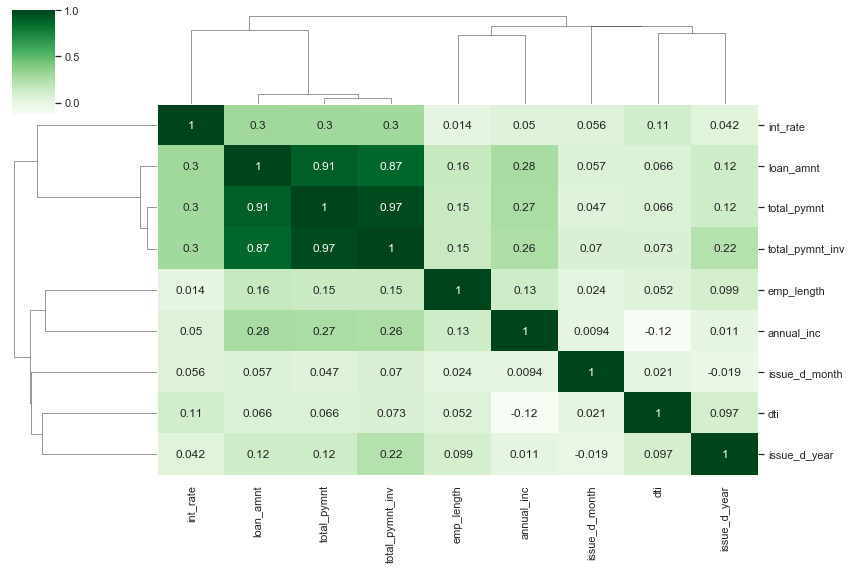

In [143]:
loan_correlation = lending_case[corr_matrix_column].corr()
sns.clustermap(loan_correlation, annot=True, figsize=(12, 8), cmap = "Greens")
plt.show()

## Bi-variate analysis, Charged off vs
    1) annual_income
    2) purpose
    3) grade vs sub grade
    4) interest rate
    5) employee_length
    6) address 
    7) verification
    8) public bankruptcies 
    
  multiple variable analyis   

#### Define the ranges for numerical variables for analysis

In [144]:
#annual income range
#lending_case['annual_inc'].describe()
bins = [0, 250000, 500000, 750000, 1000000, 1250000]
labels = ['0-250,000', '250,000-500,000', '500,000-750,000', '750,000-1000,000', '1000,000(+)']
lending_case['annual_inc_range'] = pd.cut(lending_case['annual_inc'], bins, labels)
#lending_case['annual_inc_range'].unique()

#interest rate range
#lending_case['int_rate'].describe()
bins = [0, 5.0, 10.0, 15.0, 20.0, 25.0]
labels = ['0-5.0', '5.0-10.0', '10.0-15.0', '15.0-20.0', '20.0-25.0']
lending_case['int_rate_range'] = pd.cut(lending_case['int_rate'], bins, labels)
#lending_case['int_rate'].unique()


#loan amount range
#lending_case['loan_amnt_range'].describe()
bins = [0, 7000.0, 14000.0, 21000.0, 28000.0, 35000.0]
labels = ['0-7,000.0', '7,000.0-14,000.0', '14,000.0-21,000.0', '21,000.0-28,000.0', '28,000.0-35,000.0']
lending_case['loan_amnt_range'] = pd.cut(lending_case['loan_amnt'], bins, labels)
#lending_case['loan_amnt_range'].unique()

#dti range
#lending_case['dti'].describe()
bins = [0, 10.0, 15.0, 20.0, 25.0, 30.0]
labels = ['0-10.0', '10.0-15.0', '15.0-20.0', '20.0-25.0', '25.0-30.0']
lending_case['dti_range'] = pd.cut(lending_case['dti'], bins, labels)
#lending_case['dti'].unique()

In [145]:
co_lending_case = lending_case[(lending_case['loan_status'] == 'Charged Off')]
co_lending_case = co_lending_case[(co_lending_case['annual_inc'] < 250000)]

### Charged off vs annual_income

<font color="red">
 Bin the annual income in range with cut and plot the count plot graph
 <ul> 
     <li>Most of the defaulted loans are in annual income range of 0-250K i.e. people with higer income can easily pay the loan </li> 
    </ul>
</font>

loan_status  annual_inc_range
Charged Off  (0, 250000]         5275
Name: annual_inc_range, dtype: int64


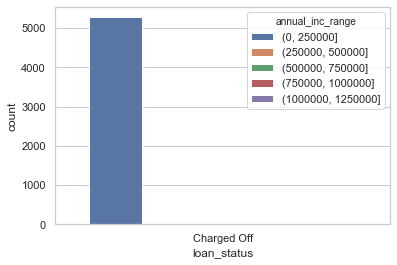

In [146]:
sns.set(style="whitegrid")
print(co_lending_case.groupby(['loan_status'])['annual_inc_range'].value_counts())
sns.countplot(x = "loan_status", hue="annual_inc_range", data = co_lending_case)

### Charged off vs purpose
<font color="red"> Highest defaulted loan were in debt_consolidation, other, credit_card followed by small_business</font>

loan_status  purpose           
Charged Off  debt_consolidation    2589
             other                  592
             credit_card            496
             small_business         438
             home_improvement       325
             major_purchase         211
             car                    157
             medical                106
             wedding                 93
             moving                  90
             house                   56
             educational             53
             vacation                51
             renewable_energy        18
Name: purpose, dtype: int64


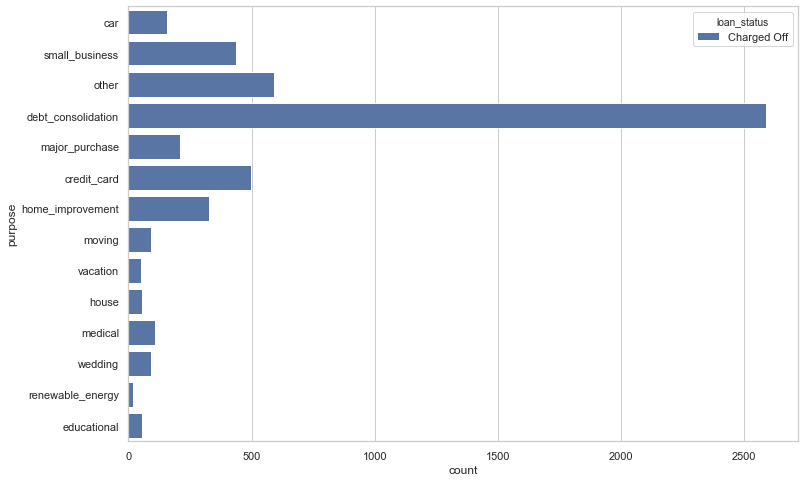

In [147]:
plt.figure(figsize=[12,8])
print(co_lending_case.groupby(['loan_status'])['purpose'].value_counts())
sns.countplot(y = "purpose", hue="loan_status", data = co_lending_case)

### Charged off vs Grade
<font color="red"> Highest defaulted loan were in grades B,C, D</font>

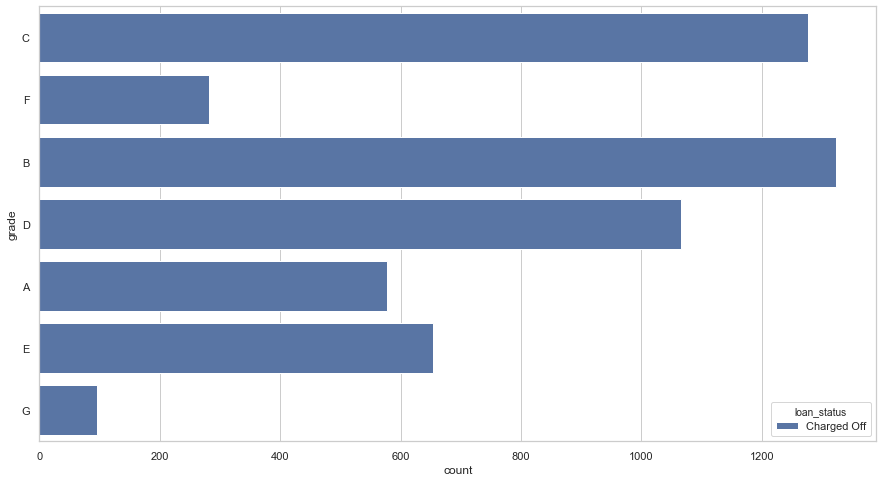

In [148]:
plt.figure(figsize=[15,8])
#print(co_lending_case.groupby(['loan_status'])['grade'].value_counts())
sns.countplot(y = "grade", hue="loan_status", data = co_lending_case)

### Charged off vs Subgrade
<font color="red"> loans in sub category of B & C are of defaulted most </font>

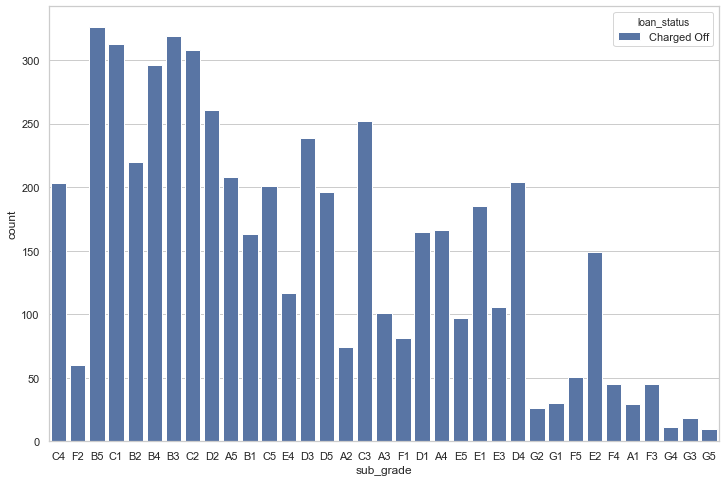

In [149]:
plt.figure(figsize=[12,8])
sns.countplot(x = "sub_grade", hue="loan_status", data = co_lending_case)

### Charged off vs Interest rate
<font color="red"> Highest interest rate for defaulted loan bar chart</font>

loan_status  int_rate_range
Charged Off  (10.0, 15.0]      2549
             (15.0, 20.0]      1675
             (5.0, 10.0]        786
             (20.0, 25.0]       265
Name: int_rate_range, dtype: int64


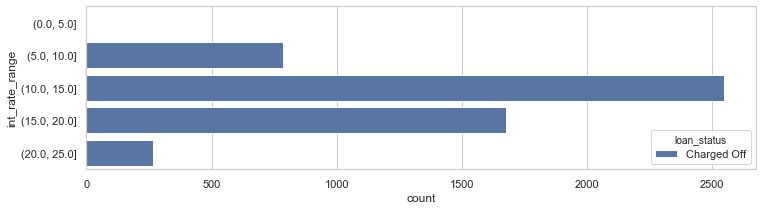

In [150]:
plt.figure(figsize=[12,3])
print(co_lending_case.groupby(['loan_status'])['int_rate_range'].value_counts())
sns.countplot(y = "int_rate_range", hue="loan_status", data = co_lending_case)

### Charged off vs employee length
<font color="red"> Maximum defaulted loan were employee 10(+) years </font>

In [151]:
co_lending_case.groupby(['loan_status'])['emp_length'].value_counts()

loan_status  emp_length
Charged Off  10            1240
             1             1018
             2              533
             3              522
             4              437
             5              437
             6              282
             7              246
             0              221
             8              192
             9              147
Name: emp_length, dtype: int64

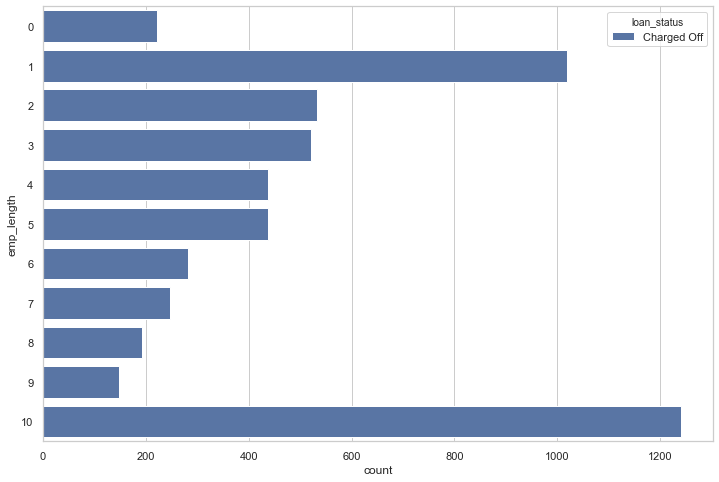

In [152]:
plt.figure(figsize=[12,8])
sns.countplot(y = "emp_length", hue="loan_status", data = co_lending_case)

### Charged off vs Address (addr_state)
<font color="red"> Maximum defaulted loan were for state CA followed by FL, NY </font>

In [153]:
co_lending_case.groupby(['loan_status'])['addr_state'].value_counts()

loan_status  addr_state
Charged Off  CA            1058
             NY             463
             FL             461
             TX             298
             NJ             254
             GA             201
             IL             186
             PA             171
             VA             167
             MA             154
             MD             152
             OH             151
             WA             120
             AZ             113
             MO             110
             NC             108
             NV             100
             MI              94
             CO              90
             CT              89
             MN              75
             OR              69
             SC              64
             WI              61
             AL              52
             LA              52
             KY              43
             OK              38
             UT              38
             KS              28
             HI 

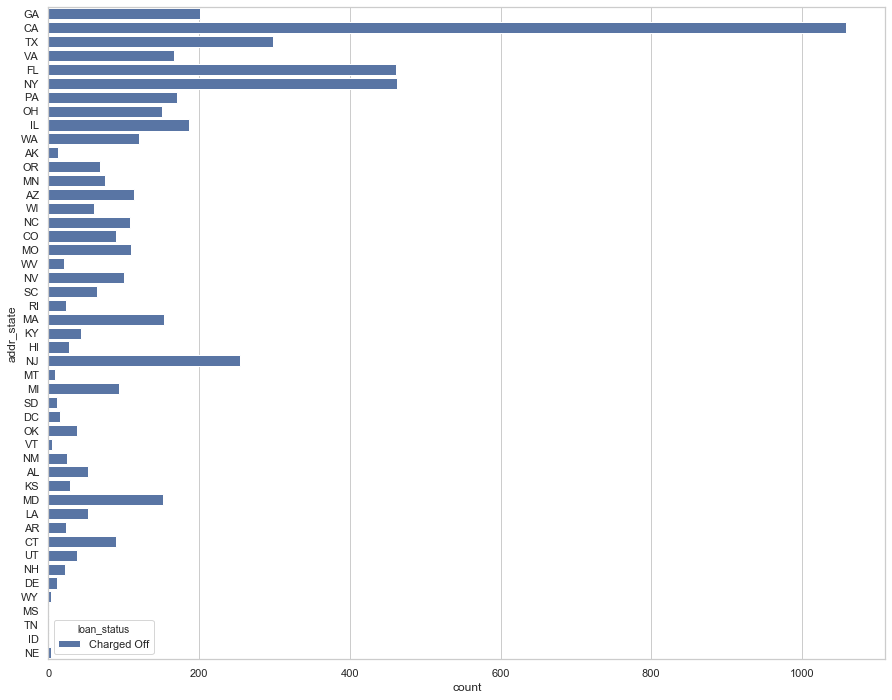

In [154]:
plt.figure(figsize=[15,12])
sns.countplot(y = "addr_state", hue="loan_status", data = co_lending_case)

### Charged off vs Verification
<font color="red"> Maximum defaulted loan were for status Not Verified</font>

loan_status  int_rate_range
Charged Off  (10.0, 15.0]      2549
             (15.0, 20.0]      1675
             (5.0, 10.0]        786
             (20.0, 25.0]       265
Name: int_rate_range, dtype: int64


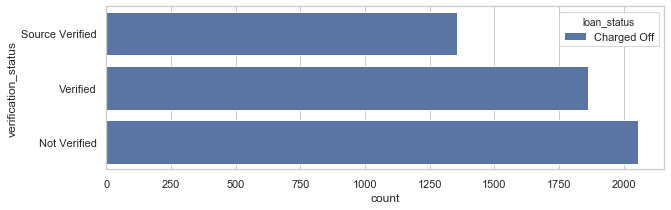

In [155]:
plt.figure(figsize=[10,3])
print(co_lending_case.groupby(['loan_status'])['int_rate_range'].value_counts())
sns.countplot(y = "verification_status", hue="loan_status", data = co_lending_case)

### Charged off vs public bankruptcies 
<font color="red"> Maximum defaulted loan were for public recorded bankruptcies with zero</font>

loan_status  pub_rec_bankruptcies
Charged Off  0.0                     4823
             1.0                      337
             Unknown                  113
             2.0                        2
Name: pub_rec_bankruptcies, dtype: int64


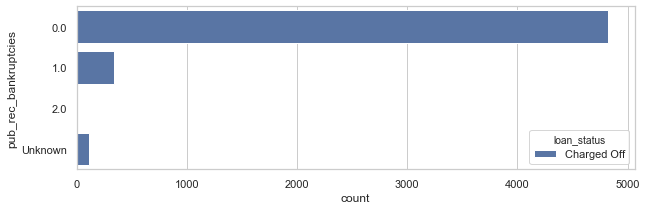

In [156]:
plt.figure(figsize=[10,3])
print(co_lending_case.groupby(['loan_status'])['pub_rec_bankruptcies'].value_counts())
sns.countplot(y = "pub_rec_bankruptcies", hue="loan_status", data = co_lending_case)

## Bi-variate analyis (comparison of variables)
    1. Loan amount vs purpose of loan
    2. Interest rate vs Term of loan
    3. Grade vs Interest Rate
    4. Year vs interest rate
    5. Loan amount vs Interest rate
    6. Dti vs interest rate
    7. Annual income across grade

### Loan amount vs purpose of loan
<font color="red"> highest loan amount in (90-95 percentile) was taken for small_business followed by debit_consolidation and credit_case
median (majority of 50%) was loan taken in debt_consolidation followed by credit_card, small_business, house </font>

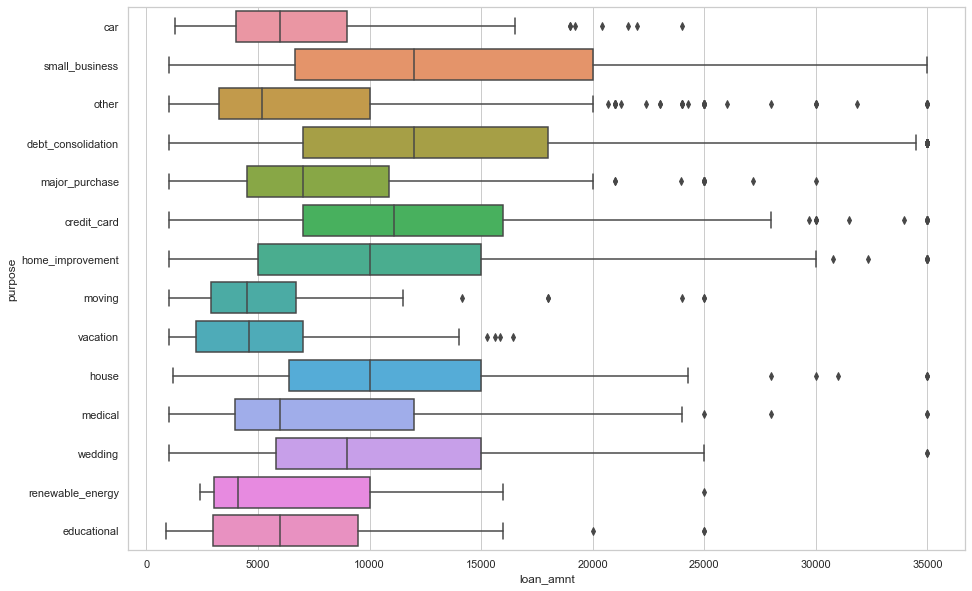

In [157]:
#lending_case[['loan_amnt', 'purpose']]

plt.figure(figsize=[15,10])
sns.boxplot(co_lending_case['loan_amnt'], co_lending_case['purpose'])
plt.show()

### Interest rate vs Term of loan
<font color='red'> Loan taken for 60 months has higher interest rate as chances of defaulting may be higher </font>

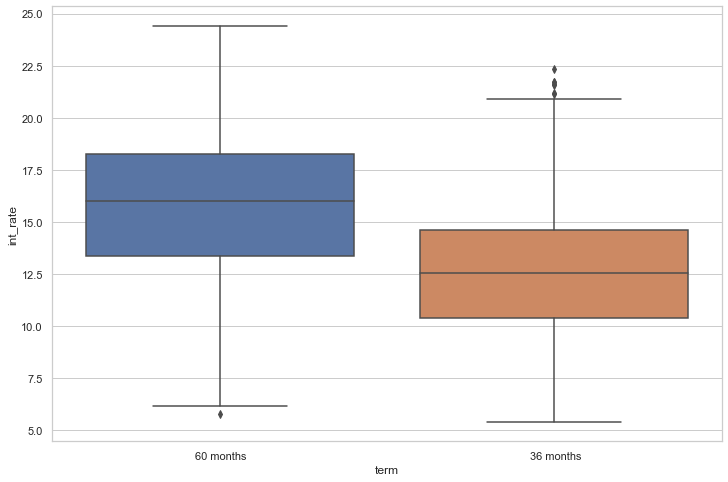

In [158]:
#lending_case[['int_rate', 'term']]
plt.figure(figsize=[12,8])
sns.boxplot(co_lending_case['term'], lending_case['int_rate'])
plt.show()

### Grade vs Interest Rate
<font color="red"> loans with bad grade i.e. higher risk has high interest rate </font>

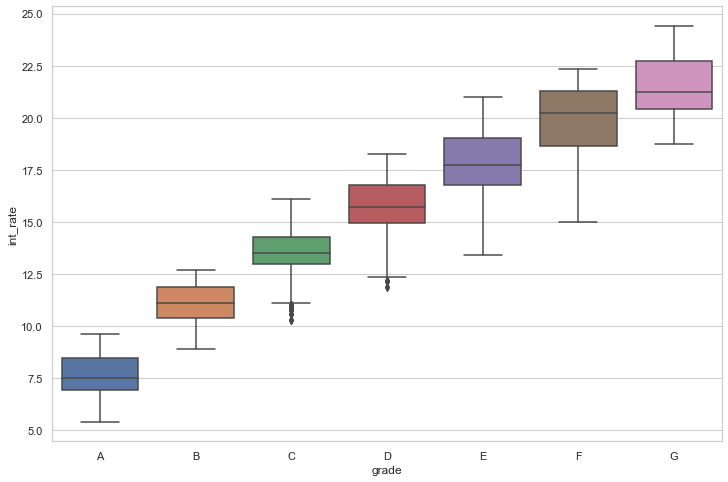

In [159]:
plt.figure(figsize=[12,8])
sns.boxplot(co_lending_case['grade'].sort_values(ascending=True), lending_case['int_rate'])
plt.show()

### Year vs interest rate
<font color="red"> 
    <ul>
        <li>As the year progresses interest rate bars keep increasing. possibility economoy is on rise.</li>
        <li>25% percentile was almost at the same level as the people income kept increasing </li>
    </ul>
<font>

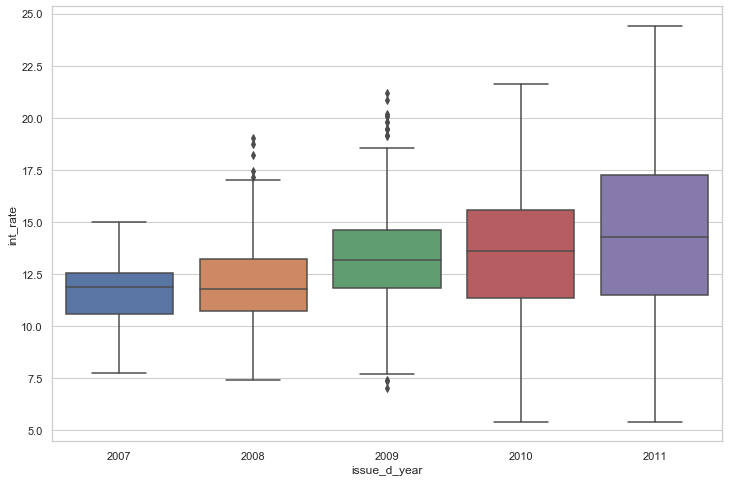

In [160]:
plt.figure(figsize=[12,8])
sns.boxplot(co_lending_case['issue_d_year'].sort_values(ascending=True), lending_case['int_rate'])
plt.show()

### Loan amount vs interest rate
<font color="red"> 
    <ul>
        <li>As the loan amount increases, interest rate also increases</li>
        <li>25%, 50%, 75% also increased the loan amount increased</li>
    </ul>
<font>

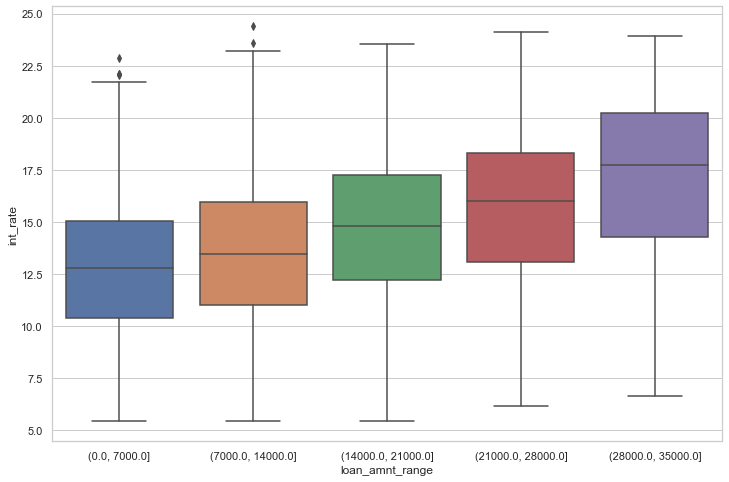

In [161]:
plt.figure(figsize=[12,8])
sns.boxplot(co_lending_case['loan_amnt_range'], co_lending_case['int_rate'])
plt.show()

### Dti vs interest rate
<font color="red"> 
    <ul>
        <li>Variation remains same across all the dti_ranges</li>
        <li>For range 25.0-30.0, it may be due to outlier and people might have exceptionally high income</li>
    </ul>
<font>

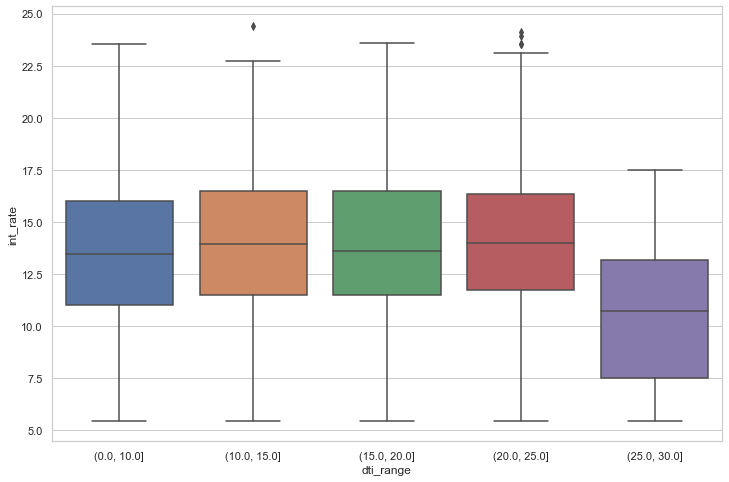

In [162]:
plt.figure(figsize=[12,8])
sns.boxplot(co_lending_case['dti_range'], co_lending_case['int_rate'])
plt.show()

### Annual income vs grade
<font color="red"> 
    <ul>
        <li>Mostly people from income range < 250000 were defaulted</li>
        <li>From Income range analysis its clear people from <= 250000 are defaulted</li>
    </ul>
<font>

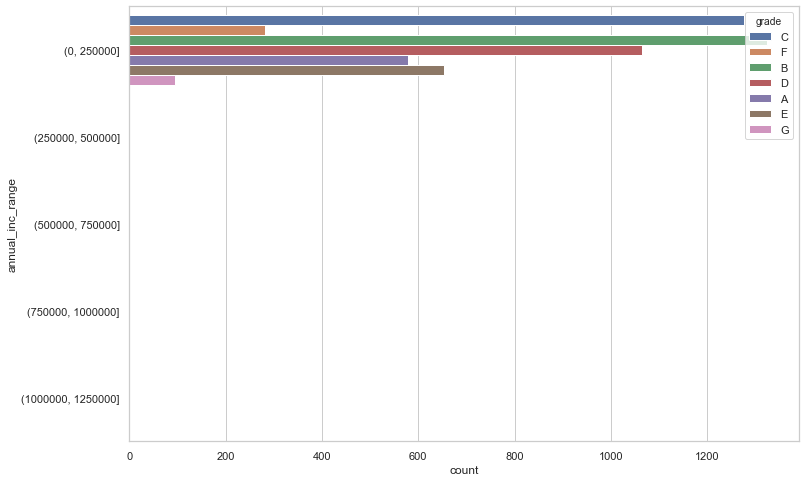

In [163]:
plt.figure(figsize=[12,8])
sns.countplot(y = "annual_inc_range", hue="grade", data = co_lending_case)

In [164]:
co_lending_case.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'pub_rec_bankruptcies',
       'issue_d_year', 'issue_d_month', 'annual_inc_range', 'int_rate_range',
       'loan_amnt_range', 'dti_range'],
      dtype='object')

### Pair plot between different numerical variables (Summary for charged off loans)

<font color="red">
 <ul>
   <li>Interest rate fairly distributed across annual income</li>    
   <li>Annual income kept increasting as the year progresses</li>  
   <li>Interest rates kept increasting as the year progresses possibly economy was on higher side</li>  
   <li>dti debit ratio fairly distributed across annual income & interest rate</li> 
 </ul>   
</font>

<Figure size 864x576 with 0 Axes>

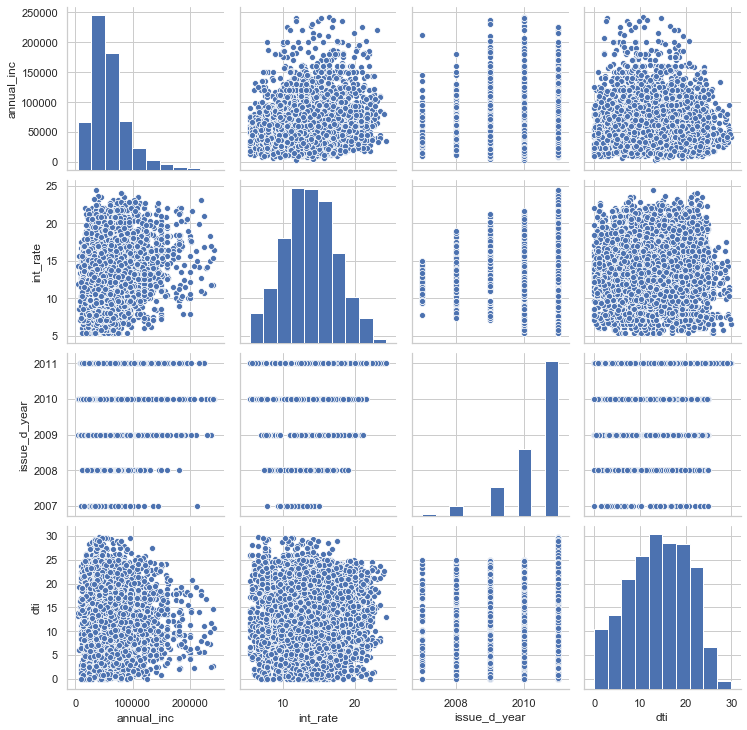

In [168]:
#df.columns
plt.figure(figsize=[12,8])
sns.pairplot(co_lending_case[['annual_inc','int_rate', 'issue_d_year', 'dti']])
plt.show()